---
<h1 style="text-align: center;">Modelagem de Redes Neurais para Previsão de Custos em Seguros de Saúde</h1>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 19/08/2024

---
---

# Introdução

As doenças cardiovasculares continuam sendo a principal causa de mortalidade no Brasil, de acordo com
o estudo Global Burden of Disease (GBD) de 2019 e os dados do Sistema Único de Saúde (SUS). O
preocupante aumento na incidência de ataques cardíacos entre jovens e adultos é amplamente atribuído
à falta de atividade física e a uma dieta inadequada. Esse panorama destaca a urgência de promover
hábitos de vida mais saudáveis, seguindo a recomendação de Michael Pollan: “descasque mais, desembale
menos”, que incentiva o consumo de alimentos frescos e não processados.

A deterioração da saúde pública tem impulsionado o crescimento do setor de planos de saúde. De
acordo com a Agência Nacional de Saúde Suplementar (ANS), o Brasil registrou um aumento de apro-
ximadamente 20,5 milhões de novos beneficiários de planos de assistência médica entre março de 2000 e
junho de 2024.

<p align="center">
  <span style="font-size: smaller;">Gráfico 01</span>
</p>
<p align="center">
  <img src="beneficiario_ans.png" alt="Gráfico mostrando o crescimento dos beneficiários de planos de saúde no Brasil" width="800"/>
</div>
</p>
<p align="center">
  <span style="font-size: smaller;">Fonte: Agência Nacional de Seguro (ANS)
  </span>
</p>

O gráfico acima ilustra o aumento no número de beneficiários ao longo de 24 anos, evidenciando
a crescente demanda por cuidados médicos. Esse crescimento torna essencial a análise e previsão das
despesas associadas aos seguros de saúde, objetivo principal deste projeto.
Para realizar esta análise, será utilizada uma base de dados disponível no [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data). A base contém
1.338 observações e 6 características, com o custo do seguro médico como variável alvo. A seguir, estão
as variáveis da base de dados:


| Atributo   | Descrição                                                      | Tipo                    |
|------------|----------------------------------------------------------------|-------------------------|
| Idade      | A idade da pessoa segurada.                                    | Inteiro                 |
| Sexo       | Gênero (masculino ou feminino) do segurado.                     | Categórico - Binário    |
| IMC        | Índice de Massa Corporal: uma medida de gordura corporal baseada na altura e no peso. | Contínuo                |
| Crianças   | O número de dependentes cobertos.                               | Inteiro                 |
| Fumante    | Se o segurado é fumante (sim ou não).                           | Categórico - Binário    |
| Região     | A área geográfica de cobertura.                                | Categórico - Nominal    |
| Encargos   | Os custos do seguro médico incorridos pelo segurado.            | Contínuo                |


# Fundamentos Teóricos e Metodológicos

O objetivo deste trabalho é prever os custos do seguro médico com base nas características dos clientes,
configurando-se como um problema de regressão. A abordagem tradicional de regressão linear pode ser
representada pela seguinte equação:

<p style="text-align: right;">
(1)
</p>

$$
\hat{y} = \beta_{0} + \beta_{1} \cdot x_{1} + \epsilon \hspace{3em} \text{(1)}
$$

Entretanto, as suposições subjacentes à regressão linear, como a normalidade das variáveis, a independência entre as características dos clientes e a normalidade dos resíduos, podem não ser atendidas neste contexto. Por essa razão, este estudo opta por utilizar redes neurais, especificamente o Perceptron Multicamadas (MLP), para realizar a previsão dos custos do seguro.

Modelos com múltiplas camadas, como o MLP, são mais adequados para resolver problemas complexos. Redes com $S \in \mathbb{N}$ neurônios são compostas por conjuntos de neurônios $O = \{o_1, o_2, \ldots, o_s\}$, vieses  $B = \{b_1, b_2, \ldots, b_s\}$, e pesos $W = \{w_{1,1}, w_{1,2}, \ldots, w_{1,k}, w_{2,1}, w_{2,2}, \ldots, w_{2,k}, \ldots, w_{j,k}\}$.


Copy code
<p align="center">
  <span style="font-size: smaller;">Gráfico 02</span>
</p>
<div style="text-align: center;">
    <img src="multicamadas_perceptron.png" alt="Arquitetura do Perceptron Multicamadas" width="400"/>
</div>  
<p align="center">
  <span style="font-size: smaller;">Fonte: <a href="https://www.researchgate.net/figure/Schematic-structure-of-a-perceptron-neural-network_fig2_260291992">https://www.researchgate.net/figure/Schematic-structure-of-a-perceptron-neural-network_fig2_260291992</a></span>
</p>

A entrada dos neurônios a partir da segunda camada oculta depende da saída dos neurônios da camada anterior. A função de ativação é dada por:


$$
\phi_i(net_j) = \phi_i\left(\sum_{k=1}^{n} w_{k,j} \cdot o_k + b_j\right)
$$

onde

$$
net_j = \sum_{k=1}^{n} w_{k,j} \cdot o_k + b_j
$$





Este crescimento reflete a crescente demanda por cuidados médicos, tornando crucial a análise e previsão das despesas associadas aos seguros de saúde, que é o foco deste projeto de aprendizado de máquina.

## Bibliotecas Utilizadas

In [2]:
# Configurando o modo de exibição do pandas
import pandas as pd
pd.options.display.float_format = "{:.4f}".format

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout

# Desativa todos os avisos
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow.keras'

# Coleta dos Dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/main/projeto/insurance.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Exploração dos Dados

A análise exploratória foi essencial para entender os padrões de custo de seguro entre diferentes perfis de
indivíduos, antes de ajustar qualquer modelo. Este processo permitiu identificar grupos com custos de
seguro elevados ou baixos, oferecendo insights valiosos sobre os fatores que influenciam essas despesas.
Além disso, a análise ajudou a investigar a correlação entre variáveis, facilitando a aplicação de trans-
formações apropriadas nos dados para melhorar o ajuste do modelo de regressão que será desenvolvido
posteriormente.

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

### Teste T



In [3]:
idade_m = X[X['sex'] == 'male']['age']
idade_f = X[X['sex'] == 'female']['age']
t = (idade_m.mean() - idade_f.mean()) / np.sqrt((idade_m.var(ddof=1)/len(idade_m) + idade_f.var(ddof=1) / len(idade_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(idade_m)+len(idade_f)-2)
t_crit

t-statistic: -0.7624734701767805


1.9617412190546957

In [4]:
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(idade_m)+len(idade_f)-2)
t_crit

1.9617412190546957

In [5]:
imc_m = X[X['sex'] == 'male']['imc']
imc_f = X[X['sex'] == 'female']['imc']
t = (imc_m.mean() - imc_f.mean()) / np.sqrt((imc_m.var(ddof=1)/len(imc_m) + imc_f.var(ddof=1) / len(imc_f)))
print(f"t-statistic: {t}")

t-statistic: 1.697027933124022


In [6]:
idade_s_y = X[X['smoke'] == 'yes']['age']
idade_s_n = X[X['smoke'] == 'no']['age']
t = (idade_s_y.mean() - idade_s_n.mean()) / np.sqrt((idade_s_y.var(ddof=1)/len(idade_s_y) + idade_s_n.var(ddof=1) / len(idade_s_n)))
print(f"t-statistic: {t}")

t-statistic: -0.9209603068505062


In [7]:
imc_s_y = X[X['smoke'] == 'yes']['imc']
imc_s_n = X[X['smoke'] == 'no']['imc']
t = (imc_s_y.mean() - imc_s_n.mean()) / np.sqrt((imc_s_y.var(ddof=1)/len(imc_s_y) + imc_s_n.var(ddof=1) / len(imc_s_n)))
print(f"t-statistic: {t}")

t-statistic: 0.1335212194724234


### Teste ANOVA

In [8]:
from scipy.stats import f
age_se = np.array(X[X['region'] == 'southeast']['age'])
age_sw = np.array(X[X['region'] == 'southwest']['age'])
age_ne = np.array(X[X['region'] == 'northwest']['age'])
age_bw = np.array(X[X['region'] == 'northeast']['age'])

mean_se = np.mean(age_se)
mean_sw = np.mean(age_sw)
mean_ne = np.mean(age_ne)
mean_bw = np.mean(age_bw)

all_a_r = np.concatenate([age_se, age_sw, age_ne, age_bw])
mean_all = np.mean(all_a_r)

k = 4
N = len(all_a_r)


QT = np.sum((all_a_r - mean_all) ** 2)

QG = len(age_se) * (mean_se - mean_all) ** 2 + \
     len(age_sw) * (mean_sw - mean_all) ** 2 + \
     len(age_ne) * (mean_ne - mean_all) ** 2 + \
     len(age_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((age_se - mean_se) ** 2) + \
     np.sum((age_sw - mean_sw) ** 2) + \
     np.sum((age_ne - mean_ne) ** 2) + \
     np.sum((age_bw - mean_bw) ** 2)

df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 0.07978158162436415
Valor Crítico F: 2.611573218649548
Não rejeitamos a hipótese nula.


In [9]:
age_c0 = np.array(X[X['children'] == 0]['age'])
age_c1 = np.array(X[X['children'] == 1]['age'])
age_c2 = np.array(X[X['children'] == 2]['age'])
age_c3 = np.array(X[X['children'] == 3]['age'])
age_c4 = np.array(X[X['children'] == 4]['age'])
age_c5 = np.array(X[X['children'] ==  5]['age'])

mean_c0 = np.mean(age_c0)
mean_c1 = np.mean(age_c1)
mean_c2 = np.mean(age_c2)
mean_c3 = np.mean(age_c3)
mean_c4 = np.mean(age_c4)
mean_c5 = np.mean(age_c5)

all_a_c = np.concatenate([age_c0, age_c1, age_c2, age_c3, age_c4, age_c5])
mean_all = np.mean(all_a_c)

k = 6
N = len(all_a_c)


QG = len(age_c0) * (mean_c0 - mean_all) ** 2 + \
     len(age_c1) * (mean_c1 - mean_all) ** 2 + \
     len(age_c2) * (mean_c2 - mean_all) ** 2 + \
     len(age_c3) * (mean_c3 - mean_all) ** 2 + \
     len(age_c4) * (mean_c4 - mean_all) ** 2 + \
     len(age_c5) * (mean_c5 - mean_all) ** 2

QD = np.sum((age_c0 - mean_c0) ** 2) + \
     np.sum((age_c1 - mean_c1) ** 2) + \
     np.sum((age_c2 - mean_c2) ** 2) + \
     np.sum((age_c3 - mean_c3) ** 2) + \
     np.sum((age_c4 - mean_c4) ** 2) + \
     np.sum((age_c5 - mean_c5) ** 2)


df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 1.497717337339237
Valor Crítico F: 2.220817484845099
Não rejeitamos a hipótese nula.


In [10]:
# Dados
imc_se = np.array(X[X['region'] == 'southeast']['imc'])
imc_sw = np.array(X[X['region'] == 'southwest']['imc'])
imc_ne = np.array(X[X['region'] == 'northwest']['imc'])
imc_bw = np.array(X[X['region'] == 'northeast']['imc'])

# Cálculo das médias dos grupos
mean_se = np.mean(imc_se)
mean_sw = np.mean(imc_sw)
mean_ne = np.mean(imc_ne)
mean_bw = np.mean(imc_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([imc_se, imc_sw, imc_ne, imc_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(imc_se) * (mean_se - mean_all) ** 2 + \
     len(imc_sw) * (mean_sw - mean_all) ** 2 + \
     len(imc_ne) * (mean_ne - mean_all) ** 2 + \
     len(imc_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((imc_se - mean_se) ** 2) + \
     np.sum((imc_sw - mean_sw) ** 2) + \
     np.sum((imc_ne - mean_ne) ** 2) + \
     np.sum((imc_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 39.49505720170287
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [11]:
print(df_between)
print(df_within)

3
1334


In [12]:
# Dados
imc_se = np.array(X[X['region'] == 'southeast']['imc'])
imc_sw = np.array(X[X['region'] == 'southwest']['imc'])
imc_ne = np.array(X[X['region'] == 'northwest']['imc'])
imc_bw = np.array(X[X['region'] == 'northeast']['imc'])

# Cálculo das médias dos grupos
mean_se = np.mean(imc_se)
mean_sw = np.mean(imc_sw)
mean_ne = np.mean(imc_ne)
mean_bw = np.mean(imc_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([imc_se, imc_sw, imc_ne, imc_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(imc_se) * (mean_se - mean_all) ** 2 + \
     len(imc_sw) * (mean_sw - mean_all) ** 2 + \
     len(imc_ne) * (mean_ne - mean_all) ** 2 + \
     len(imc_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((imc_se - mean_se) ** 2) + \
     np.sum((imc_sw - mean_sw) ** 2) + \
     np.sum((imc_ne - mean_ne) ** 2) + \
     np.sum((imc_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 39.49505720170287
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [13]:
from scipy.stats import f
children_se = np.array(X[X['region'] == 'southeast']['children'])
children_sw = np.array(X[X['region'] == 'southwest']['children'])
children_ne = np.array(X[X['region'] == 'northwest']['children'])
children_bw = np.array(X[X['region'] == 'northeast']['children'])

mean_se = np.mean(children_se)
mean_sw = np.mean(children_sw)
mean_ne = np.mean(children_ne)
mean_bw = np.mean(children_bw)

all_c_r = np.concatenate([children_se, children_sw, children_ne, children_bw])
mean_all = np.mean(all_c_r)

k = 4
N = len(all_c_r)


QT = np.sum((all_c_r - mean_all) ** 2)

QG = len(children_se) * (mean_se - mean_all) ** 2 + \
     len(children_sw) * (mean_sw - mean_all) ** 2 + \
     len(children_ne) * (mean_ne - mean_all) ** 2 + \
     len(children_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((children_se - mean_se) ** 2) + \
     np.sum((children_sw - mean_sw) ** 2) + \
     np.sum((children_ne - mean_ne) ** 2) + \
     np.sum((children_bw - mean_bw) ** 2)

df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 0.7174932934640633
Valor Crítico F: 2.611573218649548
Não rejeitamos a hipótese nula.


In [14]:
print(df_between)
print(df_within)

3
1334


In [15]:
custo_m = y[X['sex'] == 'male']
custo_f = y[X['sex'] == 'female']
t = (custo_m.mean() - custo_f.mean()) / np.sqrt((custo_m.var(ddof=1)/len(custo_m) + custo_f.var(ddof=1) / len(custo_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_m)+len(custo_f)-2)
t_crit

t-statistic: 2.1008878232359565


1.9617412190546957

### IMC - Região

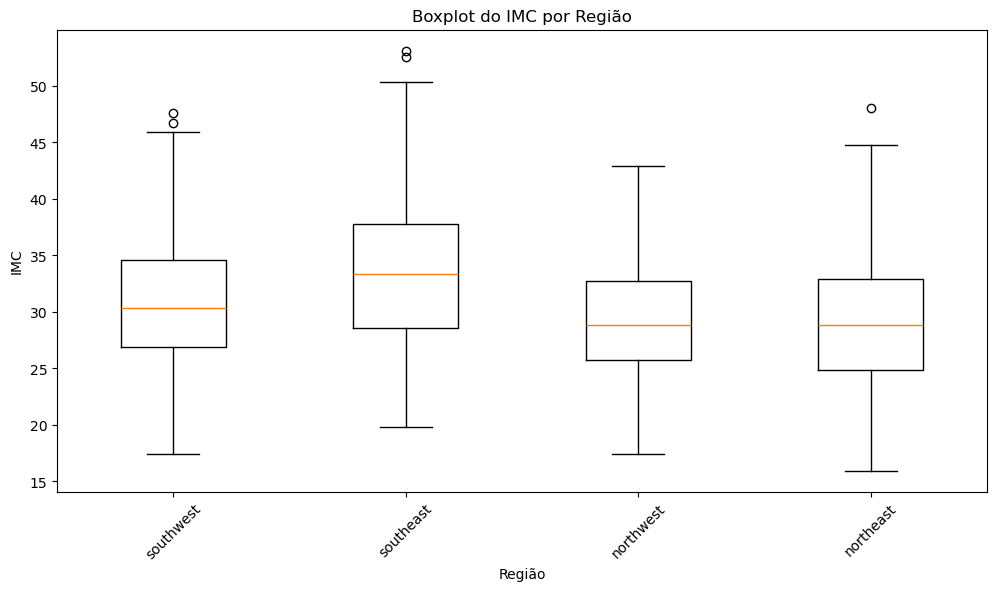

In [16]:
plt.figure(figsize=(12, 6))
plt.boxplot([X[X['region'] == region]['imc'] for region in X['region'].unique()],
            labels=X['region'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

## Variável Resposta

## Teste T

In [17]:
custo_m = y[X['sex'] == 'male']
custo_f = y[X['sex'] == 'female']
t = (custo_m.mean() - custo_f.mean()) / np.sqrt((custo_m.var(ddof=1)/len(custo_m) + custo_f.var(ddof=1) / len(custo_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_m)+len(custo_f)-2)
t_crit

t-statistic: 2.1008878232359565


1.9617412190546957

In [18]:
custo_s_y = y[X['smoke'] == 'yes']
custo_s_n = y[X['smoke'] == 'no']
t = (custo_s_y.mean() - custo_s_n.mean()) / np.sqrt((custo_s_y.var(ddof=1)/len(custo_s_y) + custo_s_n.var(ddof=1) / len(custo_s_n)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_s_y)+len(custo_s_n)-2)
t_crit

t-statistic: 32.751887766341824


1.9617412190546957

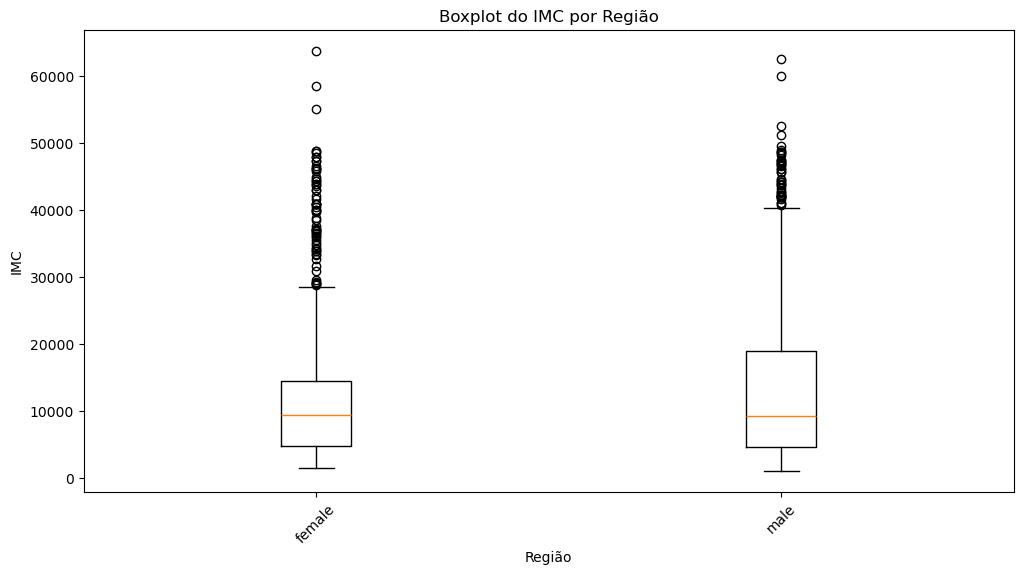

In [19]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['sex'] == region]for region in X['sex'].unique()],
            labels=X['sex'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

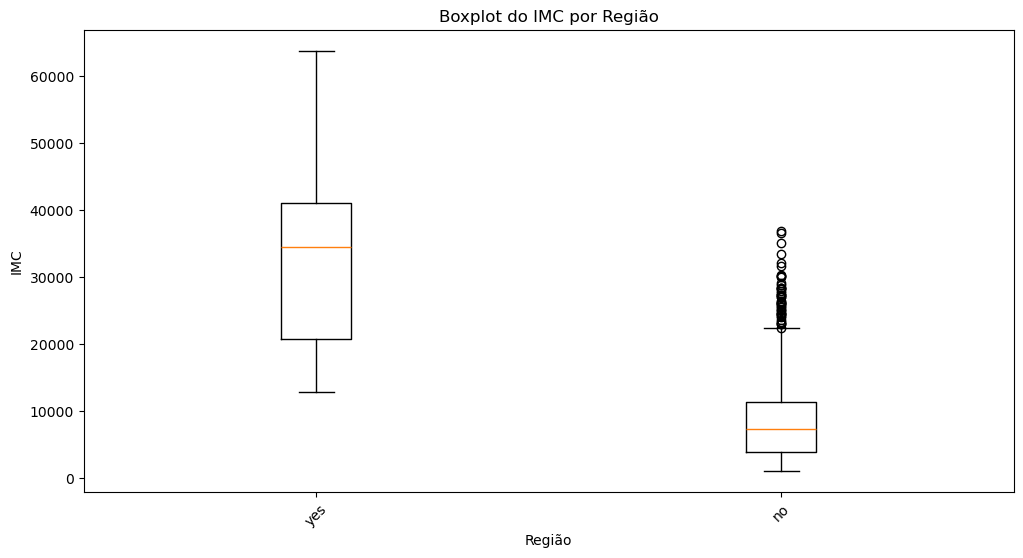

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['smoke'] == region]for region in X['smoke'].unique()],
            labels=X['smoke'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

### Correlação de Person

In [21]:
correlation = X[['age', 'imc']].corrwith(y)
correlation

age   0.2990
imc   0.1983
dtype: float64

### Teste ANOVA

In [22]:
# Dados
y_se = np.array(y[X['region'] == 'southeast'])
y_sw = np.array(y[X['region'] == 'southwest'])
y_ne = np.array(y[X['region'] == 'northwest'])
y_bw = np.array(y[X['region'] == 'northeast'])

# Cálculo das médias dos grupos
mean_se = np.mean(y_se)
mean_sw = np.mean(y_sw)
mean_ne = np.mean(y_ne)
mean_bw = np.mean(y_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([y_se, y_sw, y_ne, y_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(y_se) * (mean_se - mean_all) ** 2 + \
     len(y_sw) * (mean_sw - mean_all) ** 2 + \
     len(y_ne) * (mean_ne - mean_all) ** 2 + \
     len(y_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((y_se - mean_se) ** 2) + \
     np.sum((y_sw - mean_sw) ** 2) + \
     np.sum((y_ne - mean_ne) ** 2) + \
     np.sum((y_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 2.969626693589115
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [23]:
# Dados
y_c0 = np.array(y[X['children'] == 0])
y_c1 = np.array(y[X['children'] == 1])
y_c2 = np.array(y[X['children'] == 2])
y_c3 = np.array(y[X['children'] == 3])
y_c4 = np.array(y[X['children'] == 4])
y_c5 = np.array(y[X['children'] ==  5])

# Cálculo das médias dos grupos
mean_c0 = np.mean(y_c0)
mean_c1 = np.mean(y_c1)
mean_c2 = np.mean(y_c2)
mean_c3 = np.mean(y_c3)
mean_c4 = np.mean(y_c4)
mean_c5 = np.mean(y_c5)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([y_c0, y_c1, y_c2, y_c3, y_c4, y_c5])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 6
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(y_se) * (mean_se - mean_all) ** 2 + \
     len(y_sw) * (mean_sw - mean_all) ** 2 + \
     len(y_ne) * (mean_ne - mean_all) ** 2 + \
     len(y_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((y_se - mean_se) ** 2) + \
     np.sum((y_sw - mean_sw) ** 2) + \
     np.sum((y_ne - mean_ne) ** 2) + \
     np.sum((y_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 1.779104687793419
Valor Crítico F: 2.220817484845099
Não rejeitamos a hipótese nula.


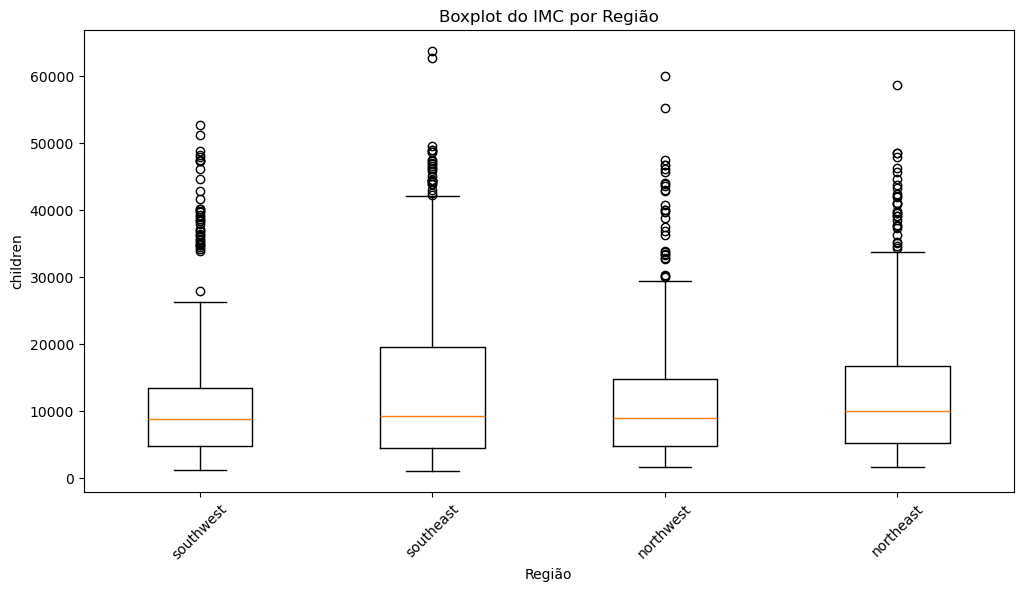

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['region'] == region]for region in X['region'].unique()],
            labels=X['region'].unique())
plt.xlabel('Região')
plt.ylabel('children')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

## Variáveis Dummy

In [25]:
X_t = pd.get_dummies(X, columns=['sex', 'smoke', 'region', 'children'])
X_t['age'] = (X_t['age'] - X_t['age'].mean()) / X_t['age'].std()
X_t['imc'] = (X_t['imc'] - X_t['imc'].mean()) / X_t['imc'].std()
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

In [26]:
# Métrica RMSE
def rmse(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [27]:
def modelo_r():
    modelo = models.Sequential()
    modelo.add(Dense(128, activation="relu", input_shape=(X_t.shape[1],)))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(128, activation="relu"))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(1, activation = 'linear'))
    modelo.compile(optimizer="adam", loss="mse", metrics=[rmse])

    return modelo

In [28]:
modelo = modelo_r()

I0000 00:00:1727115916.412698   34420 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727115916.473772   34420 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727115916.473978   34420 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727115916.474822   34420 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [29]:
hist = modelo.fit(X_train, y_train, validation_split=0.2, batch_size=32)

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'